# Job Satisfaction Prediction Model
based on kaggle Stack Overflow 2018 Developer Survey


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey = pd.read_csv('stack-overflow-2018-developer-survey/survey_results_public.csv')
print(survey.shape)

c:\users\fus ro dah\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(98855, 129)


# Selecting Feature To Be Used

feature selected for this model are rather general in nature, as most dev has experience or can easily determind his/her current condition base on feature below

- Age : respondent age
- Gender : respondent gender
- Hobby : do respondent code as a hobby
- Hours Computer: How many hours spent in front of the computer a day
- Hour Outside : how much time do you spend outside?
- Years coding: for how many years have you been coding?
- Time Fully Productive: time takes for new coder to be productive and contributing in new work    environment
- Exercise : how many times do you exercise in a week?
- Job Satisfaction : How satisfied are you with your current job
- Employment : current employment status

In [3]:
column_selected = ['Age', 'Gender', 'Hobby', 'HoursComputer', 'HoursOutside', 
'YearsCoding', 'TimeFullyProductive', 'Exercise', 'Employment', 'JobSatisfaction']
rawData = survey[column_selected]
rawData.head()

,Age,Gender,Hobby,HoursComputer,HoursOutside,YearsCoding,TimeFullyProductive,Exercise,Employment,JobSatisfaction
0,25 - 34 years old,Male,Yes,9 - 12 hours,1 - 2 hours,3-5 years,One to three months,3 - 4 times per week,Employed part-time,Extremely satisfied
1,35 - 44 years old,Male,Yes,5 - 8 hours,30 - 59 minutes,30 or more years,One to three months,Daily or almost every day,Employed full-time,Moderately dissatisfied
2,NaN,NaN,Yes,NaN,NaN,24-26 years,NaN,NaN,Employed full-time,Moderately satisfied
3,35 - 44 years old,Male,No,9 - 12 hours,Less than 30 minutes,18-20 years,Three to six months,I don't typically exercise,Employed full-time,Neither satisfied nor dissatisfied
4,18 - 24 years old,Male,Yes,Over 12 hours,1 - 2 hours,6-8 years,Three to six months,3 - 4 times per week,Employed full-time,Slightly satisfied


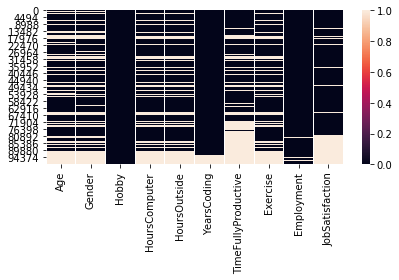

In [4]:
# check null raw data
sns.heatmap(rawData.isnull())
plt.tight_layout()
plt.show()

heatmap show how raw data has many missing value
this happen because on original survey some of the feature aren't necessary to be filled
by respondent and the survey it self change its content overtime

In [5]:
# check value on a feature

rawData = survey[column_selected]
rawData.Employment.value_counts()

Employed full-time                                      70495
Independent contractor, freelancer, or self-employed     9282
Not employed, but looking for work                       5805
Employed part-time                                       5380
Not employed, and not looking for work                   4132
Retired                                                   227
Name: Employment, dtype: int64

example above show how the survey adding conteng over time that makes
gender have so many classifications this create noise that need to be fix
before data can be explored

 #PRE-PROCESSING

treatment needed before we can make use of this data are
1. drop missing value
2. reduce classifaction on some feature
3. create dummy variable

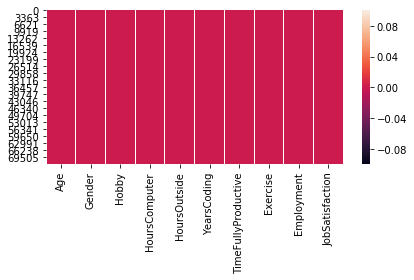

In [6]:
# drop missing value

rawData = rawData.replace('nan', np.nan)
rawData = rawData.dropna()

sns.heatmap(rawData.isnull())
plt.tight_layout()
plt.show()

figure abow show our data now have no missing value
now after data in clean we can do more further pre processing

In [7]:
# set feature and target

categorical = ['Age', 'Gender', 'Hobby', 'HoursComputer', 'HoursOutside', 
'YearsCoding', 'TimeFullyProductive', 'Exercise', 'Employment']

x = rawData[categorical]
y = rawData['JobSatisfaction']

In [8]:
## CHECK VALUES
# Feature 
for item in categorical:
    catCount = x[item].values
    print(f'{item}', len(catCount))
    print(x[item].value_counts())

# Target
targetCatCount = y.values
targetValueCount = y.value_counts()
print('JobSatisfaction', len(targetCatCount))
print(targetValueCount)

Age 46467
25 - 34 years old     25638
18 - 24 years old      9045
35 - 44 years old      8874
45 - 54 years old      2229
55 - 64 years old       539
Under 18 years old      103
65 years or older        39
Name: Age, dtype: int64
Gender 46467
Male                                                                         43046
Female                                                                        2811
Non-binary, genderqueer, or gender non-conforming                              175
Female;Transgender                                                              91
Male;Non-binary, genderqueer, or gender non-conforming                          88
Female;Male                                                                     57
Transgender                                                                     56
Female;Non-binary, genderqueer, or gender non-conforming                        35
Transgender;Non-binary, genderqueer, or gender non-conforming                   35
Female;Mal

as shown above some of our variable have too many categories that need to be reduced
so can have more generalize insight rather than too specific

In [9]:
### MINIMIZING CATEGORIES
## Feature
# gender
nonBinaryGender = ['Non-binary, genderqueer, or gender non-conforming' , 'Female;Transgender' , 'Male;Non-binary, genderqueer, or gender non-conforming' ,
'Female;Male' , 'Transgender' , 'Transgender;Non-binary, genderqueer, or gender non-conforming' , 'Female;Non-binary, genderqueer, or gender non-conforming' ,
'Male;Transgender' , 'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming' , 'Female;Transgender;Non-binary, genderqueer, or gender non-conforming' ,
'Female;Male;Transgender' , 'Male;Transgender;Non-binary, genderqueer, or gender non-conforming' , 'Female;Male;Non-binary, genderqueer, or gender non-conforming' ]
x['Gender'].replace(nonBinaryGender, 'Non Binary', inplace=True)

# years coding
years2_5 = ['3-5 years']
years5_10 = ['6-8 years', '9-11 years']
years10more = ['12-14 years', '15-17 years', '18-20 years', '21-23 years', '24-26 years',
'27-29 years', '30 or more years']
x['YearsCoding'].replace(years2_5, '2-5years',inplace=True)
x['YearsCoding'].replace(years5_10, '5-10 years',inplace=True)
x['YearsCoding'].replace(years10more, '10 years or more',inplace=True)

# time fully productive
moreThan6 = ['Six to nine months', 'Nine months to a year', 'More than a year']
x['TimeFullyProductive'].replace(moreThan6, 'six to more than a year', inplace=True)


## CHECK VALUES
# Feature 
for item in categorical:
    catCount = x[item].values
    print(f'{item}', len(catCount))
    print(x[item].value_counts())

# target
targetCatCount = y.values
targetValueCount = y.value_counts()
print('JobSatisfaction', len(targetCatCount))
print(targetValueCount)
print()

## Target
satisfied = ['Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied']
disatisfied = ['Slightly dissatisfied', 'Moderately dissatisfied', 'Extremely dissatisfied']
y.replace(satisfied, 'Satisfied', inplace=True)
y.replace(disatisfied, 'Disatisfied', inplace=True)
print(y.value_counts())

c:\users\fus ro dah\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Age 46467
25 - 34 years old     25638
18 - 24 years old      9045
35 - 44 years old      8874
45 - 54 years old      2229
55 - 64 years old       539
Under 18 years old      103
65 years or older        39
Name: Age, dtype: int64
Gender 46467
Male          43046
Female         2811
Non Binary      610
Name: Gender, dtype: int64
Hobby 46467
Yes    37772
No      8695
Name: Hobby, dtype: int64
HoursComputer 46467
9 - 12 hours        26654
5 - 8 hours         13203
Over 12 hours        6189
1 - 4 hours           361
Less than 1 hour       60
Name: HoursComputer, dtype: int64
HoursOutside 46467
1 - 2 hours             18156
30 - 59 minutes         16339
Less than 30 minutes     7349
3 - 4 hours              4028
Over 4 hours              595
Name: HoursOutside, dtype: int64
YearsCoding 46467
5-10 years          17409
10 years or more    16987
2-5years             9584
0-2 years            2487
Name: YearsCoding, dtype: int64
TimeFullyProductive 46467
One to three months        20863
Less th

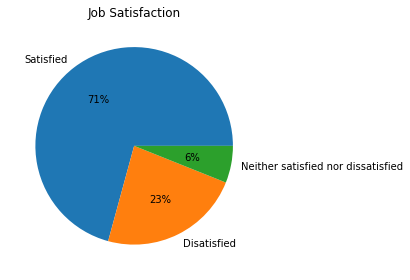

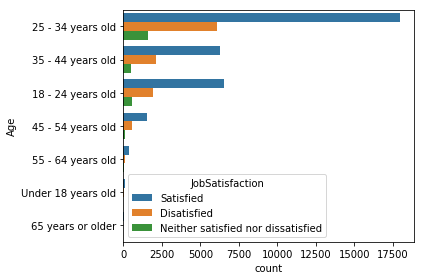

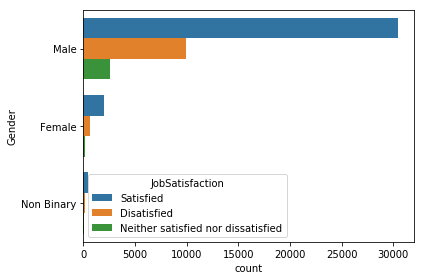

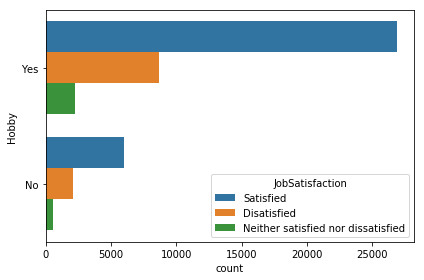

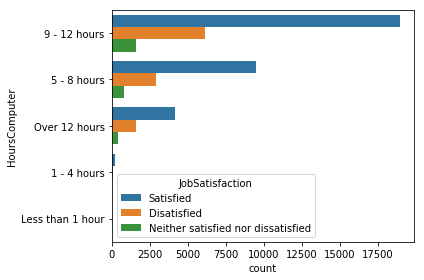

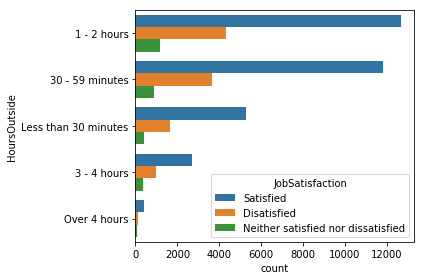

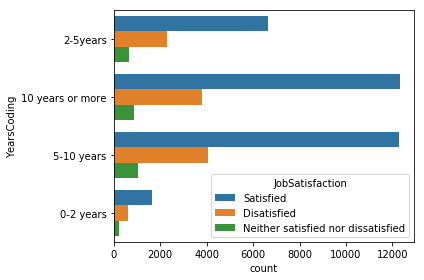

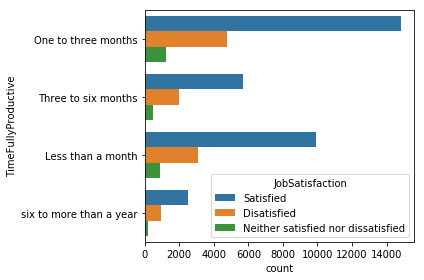

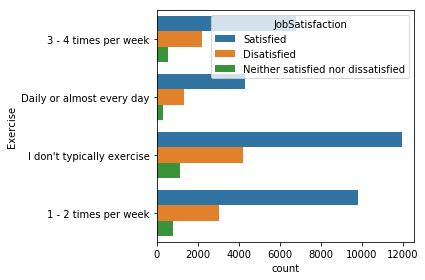

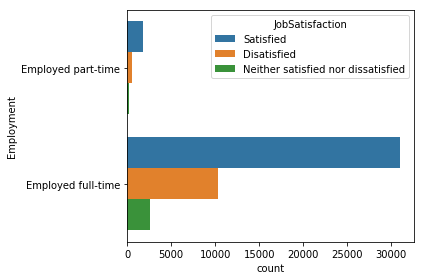

In [10]:
### VISUALIZE after before processing

joinDf = x.join(y)

## Target - Job Satisfaction
target_name = ['Satisfied', 'Disatisfied', 'Neither satisfied nor dissatisfied']
plt.pie(x=joinDf['JobSatisfaction'].value_counts(), labels=target_name, autopct='%1.0f%%')
plt.title('Job Satisfaction')
plt.tight_layout()
plt.show()


## Feature
# feature relation to target variable
for item in categorical:
    sns.countplot(y=joinDf[item], hue=joinDf['JobSatisfaction'])
    plt.tight_layout()
    plt.show()

some insight

- most respondent feel satisfied as a coder
- most dev age are under 34yo
- most dev are male
- most dev start / code as a hobby
- most dev spend more than 9 hours in front of computer
- most dev spend outside under 2 hours
- most dev have code for more than 5 years
- most dev start contributing productive result on new work environment under 3 months
- some dev don't do excercise that much in a week
- most dev are fulltime employed

In [11]:
print('feature before dummies', x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46467 entries, 0 to 80421
Data columns (total 9 columns):
Age                    46467 non-null object
Gender                 46467 non-null object
Hobby                  46467 non-null object
HoursComputer          46467 non-null object
HoursOutside           46467 non-null object
YearsCoding            46467 non-null object
TimeFullyProductive    46467 non-null object
Exercise               46467 non-null object
Employment             46467 non-null object
dtypes: object(9)
memory usage: 2.9+ MB
feature before dummies None


In [12]:
### labeling category
# dummies feature
# drop original
for feature in categorical:
    dummies = pd.get_dummies(x[feature], prefix=feature)
    x = pd.concat([x, dummies], axis=1)
    x.drop([feature], axis=1, inplace=True)
print(x.info())
print('feature rows/cols',x.shape)
print()


# encode target
y.replace(
    ['Satisfied', 'Disatisfied', 'Neither satisfied nor dissatisfied'],
    [0, 1, 2],
    inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46467 entries, 0 to 80421
Data columns (total 36 columns):
Age_18 - 24 years old                          46467 non-null uint8
Age_25 - 34 years old                          46467 non-null uint8
Age_35 - 44 years old                          46467 non-null uint8
Age_45 - 54 years old                          46467 non-null uint8
Age_55 - 64 years old                          46467 non-null uint8
Age_65 years or older                          46467 non-null uint8
Age_Under 18 years old                         46467 non-null uint8
Gender_Female                                  46467 non-null uint8
Gender_Male                                    46467 non-null uint8
Gender_Non Binary                              46467 non-null uint8
Hobby_No                                       46467 non-null uint8
Hobby_Yes                                      46467 non-null uint8
HoursComputer_1 - 4 hours                      46467 non-null uint8
HoursCo

In [13]:
print(y.head())

0    0
1    1
3    2
4    0
5    0
Name: JobSatisfaction, dtype: int64


# Modelling Machine Learning

In [14]:
### Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=0)

In [15]:
## random forest
from sklearn import metrics
import timeit
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=100, 
                             n_jobs=-1, 
                             random_state=42,
                             max_features=0.2, 
                             min_samples_leaf=1)
rfc.fit(xtrain, ytrain)
ypred_rfc = rfc.predict(xtest)
rfc_as = metrics.accuracy_score(ytest, ypred_rfc)
print('Forest score', rfc_as)

Forest score 0.6909834301700022


In [16]:
import joblib
joblib.dump(rfc, 'stackOverflowSurvey_rfc3_comp', compress=3)

['stackOverflowSurvey_rfc3_comp']

Employment             0.036971
Hobby                  0.066607
Gender                 0.082063
YearsCoding            0.102300
Age                    0.123588
HoursComputer          0.125926
HoursOutside           0.146614
Exercise               0.147749
TimeFullyProductive    0.168182
dtype: float64


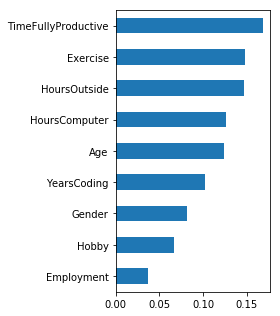

In [17]:
## FEATURE IMPORTANCE
# by feature
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    if autoscale:
        x_scale = model.feature_importances_.max() + headroom
    else:
        x_scale = 1
        
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    results = pd.Series(feature_dict, index=feature_dict.keys())
    results.sort_values(inplace=True)
    print(results)
    results.plot(kind='barh', figsize=(4, 4.5))

graph_feature_importances(rfc, x.columns, summarized_columns=categorical)
plt.tight_layout()
plt.show()

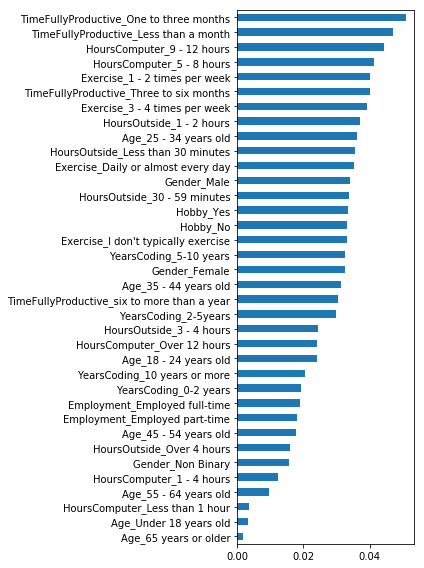

In [18]:
# by feature categories

feature_importance = pd.Series(
    rfc.feature_importances_, 
    index=x.columns).sort_values()
feature_importance.plot(kind='barh', figsize=(6, 8))
plt.tight_layout()
plt.show()


# Currect Summary
Base on our model some of the feature contribute better than other:
have impact on predicttion:
- Time fully productive
- Exercise
- Our outside
- Hour computer
        
Less impact:
- Emplyment status
- Hobby
- Gender
        
follow up example:
- Employer may optimize training for new employee so they can quickly adapt  to their new new evironment as quick as possible
- Limit worker to face computer around 5 - 12 hours a day
- for dev who feel un-satisfied with current status try exercise more rather than move to new job
    
# Optimizing
base on two plot above we can determind which feature are importand to our model
- keep what feature are more meaningfull to our model
- remove what doesn't contribute to better decission model
- try another feature then run again
- as current selected here mostly general question, different result migth come if more specific feature feed into model

[[3167  131   21]
 [ 999   43    8]
 [ 261   16    1]]
(3, 3)


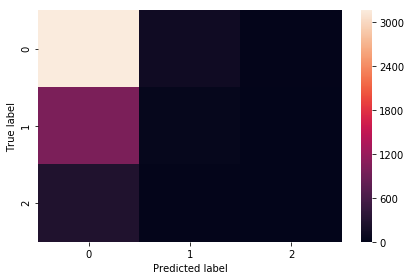

In [19]:
# confusion matrix
# create
cm = metrics.confusion_matrix(ytest, ypred_rfc)
print(cm)
print(cm.shape)

# vis
sns.heatmap(cm)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

- our model QUITE ACCURATE to predict given input as Satisfied
- but LESS ACCURATE to predict Dissatisfied and Neither Satisfied or Disatisfied
- and MORE LIKELY to predict Dissatisfied ans Neither Satisfied or Disatisfied as Satisfied

In [20]:
#### Out-Out-Sample Prediction
## map input
# age
age18_24 = [1,0,0,0,0,0,0]
age25_34 = [0,1,0,0,0,0,0]
age35_44 = [0,0,1,0,0,0,0]
age45_54 = [0,0,0,1,0,0,0]
age55_64 = [0,0,0,0,1,0,0]
age65_older = [0,0,0,0,0,1,0]
age_under18 = [0,0,0,0,0,0,1]
# gender
gender_f = [1,0,0]
gender_m = [0,1,0]
gender_nb = [0,0,1]
# hobby
hobby_y = [1,0]
hobby_n = [0,1]
# hours on computer
hour1_4 = [1,0,0,0,0]
hour5_8 = [0,1,0,0,0]
hour9_12 = [0,0,1,0,0]
hour_lessThan1 = [0,0,0,1,0]
hour_over12 = [0,0,0,0,1]
# hour outside
out1_2 = [1,0,0,0,0]
out3_4 = [0,1,0,0,0]
out30_50mnt = [0,0,1,0,0]
out_30mntLess = [0,0,0,1,0]
out_over4 = [0,0,0,0,1]
# years coding
years0_2 = [1,0,0,0]
years10_orMore = [0,1,0,0]
years2_5 = [0,0,1,0]
years5_10 = [0,0,0,1]
# time fully productive
product_lessOne = [1,0,0,0]
product_1_3 = [0,1,0,0]
product_3_6 = [0,0,1,0]
product_6_more = [0,0,0,1]
# exercise
exe_1_2_week = [1,0,0,0]
exe_3_4_week = [0,1,0,0]
exe_daily = [0,0,1,0]
exe_no = [0,0,0,1]
# employment
fullTime = [1, 0]
partTime = [0, 1]

In [23]:
# test & predict proba
# age, gender, hobby, hour computer, hour outside, years coding, time productive, exercise
sample1 = age25_34 + gender_m + hobby_y + hour5_8 + out1_2 + years0_2 + product_1_3 + exe_no + fullTime

y_oos = rfc.predict([sample1])[0]
y_oos_proba = rfc.predict_proba([sample1])[0]
status = target_name[y_oos]
percent_status = round(y_oos_proba[y_oos], 3) * 100

print(y_oos)
print(y_oos_proba)
print(f'sample1 may {status} with {percent_status} %')

0
[0.87820636 0.06848287 0.05331076]
sample1 may Satisfied with 87.8 %
